In [30]:
import requests
import wikipedia
from collections import defaultdict as dd

wikipedia.set_lang("pl")

In [31]:
with open("../../data/QA/2021-question-answering/dev-0/expected.tsv", 'r') as f:
    anserws = f.readlines()
    anserws = [a.strip().split("\t") for a in anserws]

with open("../../data/QA/2021-question-answering/dev-0/in.tsv", 'r') as f:
    questions = f.readlines()

QA_data = [{'question': questions[i], 'anserws': anserws[i]} for i in range(len(anserws))]

In [32]:
SESSION = requests.Session()
URL = "https://pl.wikipedia.org/w/api.php"

In [33]:
categories = dd(list)

for d_ind in range(len(QA_data)):
    d = QA_data[d_ind]
    d['wiki_anserws'] = [wikipedia.search(a, results=1) for a in d['anserws']]
    d['wiki_categories'] = [[] for _ in d['anserws']]
    for a_ind in range(len(d['anserws'])):
        for w_ind in range(len(d['wiki_anserws'][a_ind])):
            params = {
                "action": "query",
                "format": "json",
                "prop": "categories",
                "titles": d['wiki_anserws'][a_ind][w_ind]
            }
            data_tmp = SESSION.get(url=URL, params=params).json()["query"]["pages"]
            for k, v in data_tmp.items():
                if 'categories' in v.keys():
                    for c in v['categories']:
                        categories[c['title']].append(d_ind)
                        d['wiki_categories'][a_ind].append(c)

In [34]:
for k, v in categories.items():
    print(f"{k}: \n\t{len(v)}")

Kategoria:Artykuły z brakującymi przypisami od 2011-05: 
	3
Kategoria:Litery alfabetu greckiego: 
	2
Kategoria:Geometria syntetyczna: 
	1
Kategoria:2011 w Egipcie: 
	2
Kategoria:Arabska wiosna: 
	2
Kategoria:Polityka Egiptu: 
	2
Kategoria:Strony ujednoznaczniające: 
	113
Kategoria:Hasła kanonu polskiej Wikipedii: 
	56
Kategoria:Mazowsze: 
	1
Kategoria:Regiony historyczne Polski: 
	1
Kategoria:Historia Indii: 
	1
Kategoria:Religia w Indiach: 
	1
Kategoria:Szablon cytowania używa pól opisowych: 
	20
Kategoria:II wiek: 
	1
Kategoria:Artykuł z propozycją przetłumaczenia z języka angielskiego: 
	24
Kategoria:Artykuły z brakującymi przypisami od 2020-05: 
	1
Kategoria:Geografia Synaju: 
	1
Kategoria:Kanały wodne w Egipcie: 
	1
Kategoria:Prawo morza: 
	1
Kategoria:Polskie zespoły bigbitowe: 
	1
Kategoria:Polskie zespoły instrumentalne: 
	1
Kategoria:Polskie zespoły rockowe: 
	5
Kategoria:Historia Chińskiej Republiki Ludowej: 
	2
Kategoria:I wiek: 
	55
Kategoria:Polskie utwory dramatyczne: 
	2

In [43]:
import matplotlib.pyplot as plt

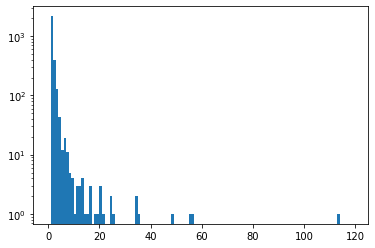

In [49]:
plt.hist([len(v) for _, v in categories.items()], bins=[i for i in range(120)])
plt.yscale('log')
plt.show()

In [41]:
{k: [' '.join(QA_data[i]['question'].split(' ')[:3]) for i in v] for k, v in categories.items() if len(v) > 5}

{'Kategoria:Strony ujednoznaczniające': ['Czy w państwach',
  'Czy owoce niektórych',
  'Czy szalej jadowity',
  'Jak ma na',
  'Czy filatelistyka obejmuje',
  'Czy Stanisław Barańczak',
  'Jak nazywa się',
  'Czy w Bałtyku',
  'Który święty, rybak',
  'Jak nazywa się',
  'Nad którą rzeką',
  'Czy traszka grzebieniasta',
  'Jak nazywał się',
  'Jak z łaciny',
  'Jaki przydomek nosił',
  'Czy Napoleon III',
  'Czy badanie na',
  'Które zwierzę jest',
  'Jak nazywa się',
  'Kto powołuje prezesa',
  'Jaki jest skrót',
  'Czy Herod I',
  'Z których drzew',
  'Co brzmi w',
  'Czy na każdym',
  'Który organ w',
  'Jakie stanowisko pełnił',
  'Czy w Polsce',
  'Czy w Chinach',
  'Ile strun liczy',
  'Czy zorza polarna',
  'W którym filmie',
  'Czy węgorz może',
  'Czy bobsleje posiadają',
  'Które zwierzę jest',
  'Jak z francuskiego',
  'Czy wapń jest',
  'Czy Sahara znajduje',
  'Podaj wzór chemiczny',
  'Na autoportrecie z',
  'Jaki pierwiastek chemiczny',
  'Czy w Ameryce',
  'Wskaż przyi

In [51]:
words = dd(lambda: 0)

for q in questions:
    words_tmp = q.split("?")[0].split(" ")
    for w in words_tmp:
        words[w] += 1


In [55]:
import pandas as pd
words = pd.Series(words)
words.sort_values(ascending=False)

się            305
Jak            255
w              253
nazywa         142
W              138
              ... 
Skoczylas        1
Leszek           1
Niedzielski      1
koronowany       1
Szlem            1
Length: 4084, dtype: int64

In [70]:
beginings = dd(lambda: 0)

for q in questions:
    for i in range(1, 4):
        w = " ".join(q.split("?")[0].split(" ")[:i])
        beginings[w] += 1

beginings = pd.Series(beginings)
beginings[beginings>3].sort_index(ascending=False)

Za                    4
Z którego państwa     6
Z którego            17
Z                    31
W którym wieku       19
                     ..
Czy w                14
Czy                  88
Co z                  4
Co oznacza            7
Co                   28
Length: 70, dtype: int64

In [68]:
import re

# heurystyka 1: pytania tak / nie
for d in QA_data:
    if re.match("Czy ", d['question']) and not re.match(r"Czy .* czy", d['question']):
        if d['anserws'][0] not in ['tak', 'nie']:
             print(d['question'])

In [114]:
print(re.match(r"jak[a-z]* (?!nazyw)", "jakiego mleka"))

<re.Match object; span=(0, 8), match='jakiego '>


In [118]:
types = dd(list)
for d in QA_data:
    if re.match("któr", d['question'].split(" ")[1]) or re.match("jak", d['question'].split(" ")[1]):
        types[d['question'].split(" ")[2]].append(d['anserws'])
    elif  re.match("któr", " ".join(d['question'].split(" ")[:2]).lower()):
        types[d['question'].split(" ")[1]].append(d['anserws'])
    elif  re.match("któr", " ".join(d['question'].split(" ")[:3]).lower()):
        types[d['question'].split(" ")[2]].append(d['anserws'])
    elif  re.match("któr", " ".join(d['question'].split(" ")[:4]).lower()):
        types[d['question'].split(" ")[3]].append(d['anserws'])
    elif re.match("jak nazywa się", " ".join(d['question'].split(" ")[:2]).lower()):
        types[d['question'].split(" ")[3]].append(d['anserws'])
    elif re.match(r"jak[a-z]* (?!nazyw)", " ".join(d['question'].split(" ")[:2]).lower()):
        types[d['question'].split(" ")[1]].append(d['anserws'])
types

defaultdict(list,
            {'państwie': [['w Egipcie'],
              ['w Indiach'],
              ['w Kanadzie'],
              ['w Wielkiej Brytanii'],
              ['w Stanach Zjednoczonych', 'w USA'],
              ['w Chinach'],
              ['w Czechach'],
              ['w Chinach'],
              ['w Niemczech'],
              ['w Rumunii'],
              ['w Niemczech'],
              ['w Polsce'],
              ['w Szwecji'],
              ['w Egipcie'],
              ['w Stanach Zjednoczonych', 'w USA'],
              ['w Argentynie'],
              ['na Litwie'],
              ['Rumunia'],
              ['w Chinach'],
              ['w Afganistanie']],
             'zespole': [['Mazowsze']],
             'numer': [['102']],
             'rzemieślnicy': [['szewcy']],
             'kraju': [['Stanów Zjednoczonych', 'USA'],
              ['z Francji'],
              ['z Hiszpanii'],
              ['Francji'],
              ['Holandii']],
             'brzmi': [['mopanku']

In [83]:
names = dd(list)
for d in QA_data:
    if re.match("Jak nazyw", d['question']):
        names[" ".join(d['question'].split(" ")[3:5])].append(d['anserws'])
names

# could look for synonims (similar embeddings)

defaultdict(list,
            {'pierwsza litera': [['alfa']],
             'dowolny odcinek': [['cięciwa']],
             'pierwiastek o': [['becquerel']],
             'sztywny kapelusz': [['melonik']],
             'wypukła albo': [['menisk']],
             'fizyk, który': [['Aleksander Graham Bell']],
             'wzgórze w': [['Montmartre']],
             'trucizna przyrządzona': [['cykuta']],
             'stolica Kuby?\n': [['Hawana']],
             'agent brytyjskiego': [['James Bond']],
             'przyrząd do': [['fajka']],
             'potomek osadników': [['Kreol']],
             'mistrzyni Polski': [['Helena Marusarzówna']],
             'grecki bóg,': [['Hermes']],
             'tradycyjna żydowska': [['jarmułka',
               'kipa',
               'sztrajmł',
               'sztrajmel',
               'sztrejmł']],
             'najwyższy szczyt': [['Radziejowa']],
             'przodownik chóru': [['koryfeusz']],
             'jednostka w': [['dywizjon', 'pułk lot

In [89]:
for d in QA_data:
    if re.match(r".* czy ", d['question']):
        if sum([d['anserws'][0] in p for p in  d['question'].split(" czy ")]) == 0:
            print(d['question'].split("czy"), d['anserws'])

['Co ile lat odradzał się z popiołów mityczny feniks – co 50, co 500 ', ' co 5000 lat?\n'] ['co 500 lat']
['Miesiąc miodowy to okres przed ', ' po ślubie?\n'] ['przed ślubem']


In [123]:
for d in QA_data:
    if re.match("Ile ", d['question']):
        for a in d['anserws']:
            cc = 0
            try:
                float(a.replace(",", "."))
            except:
                cc += 1
        if cc == len(d['anserws']):
            print(d['anserws'])

['beczkę']
['6 niedziel']
['21 dni']


In [126]:
for d in QA_data:
    if re.match("Kto ", d['question']) or re.match(".* kto ", d['question']) or re.match("Kogo ", d['question']) or re.match(".* kto ", d['question']):
        print(d['anserws'])

['Paul Gauguin']
['Roman Kłosowski']
['Katarzyna Cichopek']
['prezydent']
['Julian Tuwim']
['David Livingstone']
['Hades']
['Marek Kondrat']
['Jan III Sobieski']
['Jean Foucault']
['Marcin Luter']
['Sejm']
['Stefan Żeromski']
['Walt Disney']
['Jankiel']
['admirał floty']
['Jadwiga']
['Jan bez Ziemi']
['Władysław Reymont']
['Rudolf Diesel']
['Piotr Czajkowski']
['Ignacy Krasicki']
['Mikołaj Rej']
['Jan Sobieski']
['Roald Amundsen']
['od miecza']
['Kościuszko']
['Matka Boska']
['Louis Braille']
['Karol IV Luksemburski']
['Jan Brzechwa']
['Józefa Piłsudskiego']
['Julian Tuwim']
['Jan Brzechwa']
['Jerzy Andrzejewski']
['Julian Tuwim']
['Tennessee Williams']
['John Glenn']
['Jan Zamoyski']
['Włodzimierz Wolski']
['Walt Disney']
['Orfeusz']
['Anteusz']
['Marlon Brando']
['Elżbieta II', 'królowa brytyjska']
['Stanisław Mikołajczyk']
['Hypnos']
['Posejdon']
['Mikołaj Kopernik']
['Isaac Newton']
['Juliusz Słowacki']
['wikingowie']
['Ingmar Bergman']
['lis']
['Adam Mickiewicz']
['Franciszek Karp

In [130]:
counter = 0
for d in QA_data:
    if re.match("Czy ", d['question']) and not re.match(r"Czy .* czy", d['question']):
        continue
    if re.match(r".* czy ", d['question']):
        continue
    if re.match("Ile ", d['question']):
        continue
    if re.match("któr", d['question'].split(" ")[1]) or re.match("jak", d['question'].split(" ")[1]):
        continue
    if  re.match("któr", " ".join(d['question'].split(" ")[:4]).lower()):
        continue
    if re.match("jak nazywa się", " ".join(d['question'].split(" ")[:2]).lower()):
        continue
    if re.match("Jak nazyw", d['question']):
        continue
    if re.match(r"jak[a-z]* (?!nazyw)", " ".join(d['question'].split(" ")[:2]).lower()):
        continue
    if re.match("Kto ", d['question']) or re.match(".* kto ", d['question']) or re.match("Kogo ", d['question']) or re.match(".* kto ", d['question']):
        continue
    print(f"{counter}. {d['question']}")
    counter += 1

0. Co budował w Egipcie inżynier Tarkowski, ojciec Stasia?

1. Kwartet – to ilu wykonawców?

2. Co znaczy pochodzące z francuskiego słowo aliant?

3. Co znaczą słowa „Quo vadis”?

4. Proszę rozwinąć skrót powstałego w 1918 roku urzędu GUS.

5. Dokończ przysłowie: „dobry zwyczaj: nie...”?

6. Gdzie miały miejsce objawienia z 1917 roku?

7. W zdaniu: „Szybko przeskoczył przez płot” który wyraz jest przysłówkiem?

8. Tzw. suchy lód to stała postać którego związku chemicznego?

9. Co z greckiego oznacza ochlokracja?

10. Gdzie w październiku 1813 roku stoczono bitwę przegraną przez Napoleona?

11. Co produkowała wytwórnia astronoma Jana Heweliusza?

12. Co wykluwa się z żabiego skrzeku?

13. Mistrzostwa świata w której dyscyplinie bronił w 2013 roku Sergio Martinez?

14. Kardynał Richelieu był sekretarzem którego francuskiego króla?

15. „Coś Ty Atenom zrobił, Sokratesie” – czyjego autorstwa jest to utwór?

16. Z mleka którego zwierzęcia wyrabiana jest serwatka zwana żętycą?

17. Do kogo s

In [131]:
import pickle
with open('QA_data.pkl', 'wb') as f:
    pickle.dump(QA_data, f)